In [41]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from datetime import datetime, timezone
from collections import Counter


In [64]:
# Load Data into Panda Dataframe

file_path = 'data/SensorLogFiles/2023-05-11_1_19_58 PM_Apple Watch.csv'

df = pd.read_csv(file_path, engine='python')
df = df[2000:2500]
display(df)


,loggingTime(txt),locationTimestamp_since1970(s),locationLatitude(WGS84),locationLongitude(WGS84),locationAltitude(m),locationSpeed(m/s),locationSpeedAccuracy(m/s),locationCourse(°),locationCourseAccuracy(°),locationVerticalAccuracy(m),...,pedometerDistance(m),pedometerFloorAscended(N),pedometerFloorDescended(N),pedometerEndDate(txt),altimeterTimestamp_sinceReboot(s),altimeterReset(bool),altimeterRelativeAltitude(m),altimeterPressure(kPa),batteryState(N),batteryLevel(R)
2000,2023-05-11T13:21:08.179-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,2023-05-11T13:21:08.220-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,2023-05-11T13:21:08.260-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,2023-05-11T13:21:08.300-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,2023-05-11T13:21:08.340-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2023-05-11T13:21:28.041-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2496,2023-05-11T13:21:28.082-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2497,2023-05-11T13:21:28.122-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2498,2023-05-11T13:21:28.162-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Get X,Y,Z Data
x_data = df["accelerometerAccelerationX(G)"]
y_data = df["accelerometerAccelerationY(G)"]
z_data = df["accelerometerAccelerationZ(G)"]

In [66]:
# Obtain Elapsed Time


timestamps = pd.to_datetime(df["loggingTime(txt)"])
time_diff = timestamps.diff()
cumulative_seconds = time_diff.dt.total_seconds().cumsum().fillna(0)


df["Elapsed Time (s)"] =cumulative_seconds  

In [67]:
# # Resample dataframe at X second intervals

# freq = 1

# df['timestamp'] = pd.to_datetime(df["loggingTime(txt)"])

# # Set the "timestamp" column as the dataframe index
# df.set_index('timestamp', inplace=True)

# # Downsample the dataframe to a lower frequency within each interval
# downsampled_df = df.resample(str(freq)+'S').mean()
# df_without_nan_downsampled_df = df.dropna(axis=1)

In [68]:
# # New downsampled time series data

# new_x_data = downsampled_df["accelerometerAccelerationX(G)"]
# new_y_data = downsampled_df["accelerometerAccelerationY(G)"]
# new_z_data = downsampled_df["accelerometerAccelerationZ(G)"]

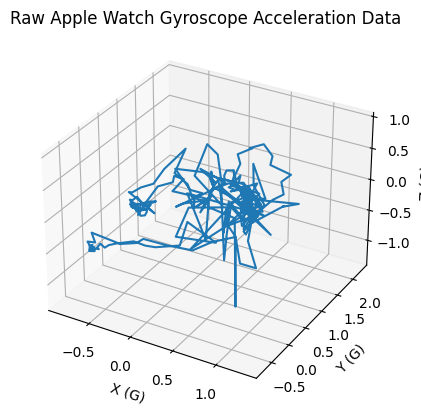

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_data, y_data, z_data)

ax.set_xlabel('X (G)')
ax.set_ylabel('Y (G)')
ax.set_zlabel('Z (G)')

ax.set_title('Raw Apple Watch Gyroscope Acceleration Data')

plt.show()

In [70]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(new_x_data, new_y_data, new_z_data)

# ax.set_xlabel('X (G)')
# ax.set_ylabel('Y (G)')
# ax.set_zlabel('Z (G)')

# ax.set_title('Downsampled Apple Watch Gyroscope Acceleration Data')

# plt.show()

In [71]:
time = df['Elapsed Time (s)']

df['Acceleration X (m/s2)'] = df['motionUserAccelerationX(G)'] * 9.80665
df['Acceleration Y (m/s2)'] = df['motionUserAccelerationY(G)']* 9.80665
df['Acceleration Z (m/s2)'] = df['motionUserAccelerationZ(G)']* 9.80665



# Calculate velocity X by integrating acceleration over time
df['Velocity X (m/s)'] = df['Acceleration X (m/s2)'].cumsum() * df['Elapsed Time (s)'].diff().fillna(0)

# Calculate velocity Y by integrating acceleration over time
df['Velocity Y (m/s)'] = df['Acceleration Y (m/s2)'].cumsum() * df['Elapsed Time (s)'].diff().fillna(0)

# Calculate velocity Z by integrating acceleration over time
df['Velocity Z (m/s)'] = df['Acceleration Z (m/s2)'].cumsum() * df['Elapsed Time (s)'].diff().fillna(0)

# Calculate distance X by integrating velocity over time
df['Distance X (m)'] = df['Velocity X (m/s)'].cumsum() * df['Elapsed Time (s)'].diff().fillna(0)

# Calculate distance Y by integrating velocity over time
df['Distance Y (m)'] = df['Velocity Y (m/s)'].cumsum() * df['Elapsed Time (s)'].diff().fillna(0)

# Calculate distance Z by integrating velocity over time
df['Distance Z (m)'] = df['Velocity Z (m/s)'].cumsum() * df['Elapsed Time (s)'].diff().fillna(0)

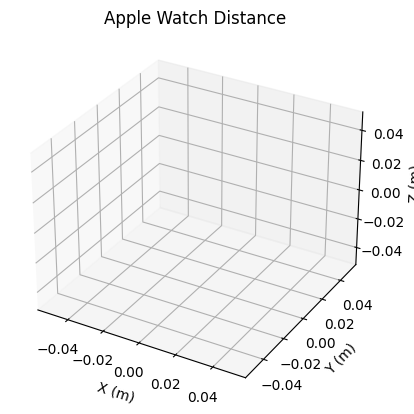

In [74]:
x_dist = df["Distance X (m)"]
y_dist = df["Distance Y (m)"]
z_dist = df["Distance Z (m)"]

print(x_dist)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_dist, y_dist, z_dist)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')

ax.set_title('Apple Watch Distance')

plt.show()

In [62]:
display(df)

,loggingTime(txt),locationTimestamp_since1970(s),locationLatitude(WGS84),locationLongitude(WGS84),locationAltitude(m),locationSpeed(m/s),locationSpeedAccuracy(m/s),locationCourse(°),locationCourseAccuracy(°),locationVerticalAccuracy(m),...,Elapsed Time (s),Acceleration X (m/s2),Acceleration Y (m/s2),Acceleration Z (m/s2),Velocity X (m/s),Velocity Y (m/s),Velocity Z (m/s),Distance X (m),Distance Y (m),Distance Z (m)
2000,2023-05-11T13:21:08.179-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,2023-05-11T13:21:08.220-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,2023-05-11T13:21:08.260-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,2023-05-11T13:21:08.300-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,2023-05-11T13:21:08.340-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2023-05-11T13:21:48.104-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2996,2023-05-11T13:21:48.144-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2997,2023-05-11T13:21:48.185-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998,2023-05-11T13:21:48.225-07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Downsampled Apple Watch Distance

downsampled_df = df.resample(str(freq)+'S').mean()
df_without_nan_downsampled_df = df.dropna(axis=1)
new_x_dist = downsampled_df["Distance X (m)"]
new_y_dist = downsampled_df["Distance Y (m)"]
new_z_dist = downsampled_df["Distance Z (m)"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(new_x_dist, new_y_dist, new_z_dist)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')

ax.set_title('Downsampled Apple Watch Distance')

plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

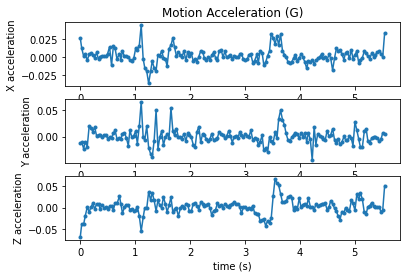

In [ ]:
# Acceleration Data 


x_accel = df["motionUserAccelerationX(G)"]
y_accel = df["motionUserAccelerationY(G)"]
z_accel = df["motionUserAccelerationZ(G)"]

plt.subplot(3, 1, 1)
plt.plot(time, x_accel, '.-')
plt.title('Motion Acceleration (G)')
plt.ylabel('X acceleration')

plt.subplot(3, 1, 2)
plt.plot(time, y_accel, '.-')
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(time, z_accel, '.-')
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.show()

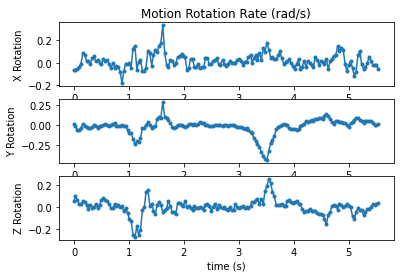

In [ ]:
# Rotation Data 

x_accel = df["motionRotationRateX(rad/s)"]
y_accel = df["motionRotationRateY(rad/s)"]
z_accel = df["motionRotationRateZ(rad/s)"]

plt.subplot(3, 1, 1)
plt.plot(time, x_accel, '.-')
plt.title('Motion Rotation Rate (rad/s)')
plt.ylabel('X Rotation')

plt.subplot(3, 1, 2)
plt.plot(time, y_accel, '.-')
plt.xlabel('time (s)')
plt.ylabel('Y Rotation')

plt.subplot(3, 1, 3)
plt.plot(time, z_accel, '.-')
plt.xlabel('time (s)')
plt.ylabel('Z Rotation')

plt.show()

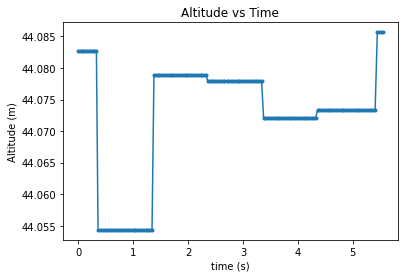

In [ ]:
# Golf Swing 

altitude = df["locationAltitude(m)"]

plt.plot(time, altitude, '.-')
plt.xlabel('time (s)')
plt.ylabel('Altitude (m)')
plt.title('Altitude vs Time')
plt.show()

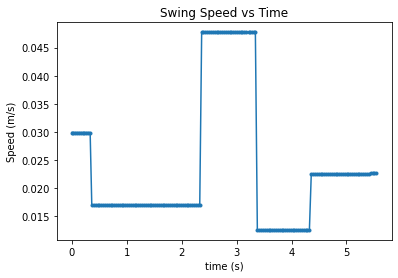

In [ ]:
# Speed vs Time 

speed = df["locationSpeed(m/s)"]

plt.plot(time,speed, '.-')
plt.xlabel('time (s)')
plt.ylabel('Speed (m/s)')
plt.title('Swing Speed vs Time')
plt.show()



In [ ]:
# Correlation between acceleration in the Y direction and latitude

correlation = df['accelerometerAccelerationY(G)'].corr(df['locationLatitude(WGS84)'])

print("Correlation between acceleration in the Y and latitude:", correlation)

Correlation between acceleration in the Y and latitude: -0.8327269224921477
